In [236]:
import tradingeconomics as te
import pandas as pd
import matplotlib.dates as md
import matplotlib.pyplot as plt

In [264]:
te.login('jupyter:jupyter'); # Signup for a free API key at https://developer.tradingeconomics.com/

# Get historical data for commodities

In [238]:
# Get commodities data
data = te.getMarketsData(marketsField = 'commodities', output_type = 'df')

In [239]:
commodities_group = data.query(f'Group == "Energy"') # Choose any commodity.
comm_symbols = commodities_group['Symbol'].tolist()

In [240]:
# fetch commodities historical data
comm_hist = te.fetchMarkets(comm_symbols, initDate='2022-01-01', output_type='df') # choose whatever date you intend
comm_hist

,symbol,open,high,low,close
2022-07-13,CMA:COM,2293.0000,2293.0000,2293.0000,2293.0000
2022-07-13,HO1:COM,3.6521,3.7602,3.6156,3.7263
2022-07-13,XAL1:COM,432.0000,432.0000,432.0000,432.0000
2022-07-13,NGUK:COM,280.0000,300.0100,263.5000,265.0000
2022-07-13,NGEU:COM,178.0000,185.0000,174.0000,181.5000
...,...,...,...,...,...
2022-01-03,DL1:COM,2.2900,2.2900,2.2900,2.2900
2022-01-03,MOB:COM,728.3270,728.3270,728.3270,728.3270
2022-01-03,UXA:COM,43.6500,43.6500,43.6500,43.6500
2022-01-03,PNL:COM,1.1044,1.1044,1.1044,1.1044


In [241]:
# find the earliest date that all commodities have in common
earliest_date = commodities_group.StartDate.max()
earliest_date = earliest_date.split('T')[0]
earliest_date

'2014-06-17'

In [246]:
# get commodity prices on that date
commodity_data_init = te.fetchMarkets(symbol=comm_symbols, initDate=earliest_date, endDate=earliest_date, output_type='df')

In [247]:
comm_hist = pd.concat([comm_hist, commodity_data_init])

In [248]:
df = pd.DataFrame()
df.index.name = 'Date'
for item in comm_symbols:
    raw_data = comm_hist.loc[comm_hist['symbol'] == item]
    
    # get the name of the commodity
    commodity_row = commodities_group.loc[commodities_group['Symbol'] == item]
    commodity_name = commodity_row['Name'].values[0]
    
    market_close_data = raw_data[['close']].rename(columns={'close': commodity_name + ' (' + item + ')'})
    market_close_data.index.name = 'Date'
    
    df = pd.merge(df, market_close_data, on='Date', how='outer')
    
df = df.sort_index(ascending=False)
df

,Crude Oil (CL1:COM),Brent (CO1:COM),Natural gas (NG1:COM),Gasoline (XB1:COM),Heating Oil (HO1:COM),Coal (XAL1:COM),TTF Gas (NGEU:COM),UK Gas (NGUK:COM),Ethanol (DL1:COM),Naphtha (MOB:COM),Uranium (UXA:COM),Propane (PNL:COM),Methanol (CMA:COM),Urals Oil (URDB:COM)
Date,,,,,,,,,,,,,,
2022-07-13,97.12,100.43,6.665,3.2302,3.7263,432.00,181.500,265.00,NaN,NaN,NaN,NaN,2293.0,NaN
2022-07-12,95.84,99.49,6.163,3.2646,3.6626,426.00,172.609,244.02,2.450,766.168,47.70,1.1541,2300.0,79.22
2022-07-11,104.09,107.10,6.426,3.4622,3.7681,419.00,164.520,222.24,2.530,798.445,48.40,1.1868,2319.0,85.15
2022-07-08,104.79,107.02,6.034,3.4471,3.6729,412.00,175.212,255.52,2.520,806.115,48.50,1.1831,2449.0,84.87
2022-07-07,102.73,104.65,6.297,3.4204,3.6739,410.00,183.183,298.32,2.435,795.134,48.60,1.1820,2447.0,85.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,78.88,81.29,3.812,2.3103,2.4493,193.00,96.502,235.20,2.175,735.046,47.00,1.1029,2528.0,80.89
2022-01-05,77.47,80.19,3.882,2.2975,2.4192,180.00,91.522,223.45,2.180,726.804,45.40,1.0998,2506.0,79.57
2022-01-04,76.74,79.55,3.717,2.2820,2.3872,174.00,88.741,216.57,2.300,729.619,43.70,1.1131,2518.0,77.62


## Convert non US commodities to US commodities

In [249]:
# Get non US based commodities
non_US_commodities = commodities_group[~commodities_group['unit'].str.contains("USD", case=False, regex=False)]
non_US_commodities[['Symbol', 'Name', 'unit']]

,Symbol,Name,unit
15,NGEU:COM,TTF Gas,EUR/MWh
16,NGUK:COM,UK Gas,GBp/thm
27,CMA:COM,Methanol,CNY/T


In [250]:
# Change cents/pence to dollar/pound
for index, row in commodities_group.iterrows():
    
    # change pence -> pound & cents to dollar
    # TODO: Use Dataframe.apply function
    if commodities_group.loc[index, 'unit'].split('/')[0] == 'GBp' or commodities_group.loc[index, 'unit'].split('/')[0] == 'USd':
        col_name = [col_name for col_name in df.columns if row.Symbol in col_name]
        df[col_name] = df[col_name] / 100
#         commodities_group.loc[index, 'unit'] = commodities_group.loc[index, 'unit'].split('/')[0].upper() + '/' + commodities_group.loc[index, 'unit'].split('/')[1]
df

,Crude Oil (CL1:COM),Brent (CO1:COM),Natural gas (NG1:COM),Gasoline (XB1:COM),Heating Oil (HO1:COM),Coal (XAL1:COM),TTF Gas (NGEU:COM),UK Gas (NGUK:COM),Ethanol (DL1:COM),Naphtha (MOB:COM),Uranium (UXA:COM),Propane (PNL:COM),Methanol (CMA:COM),Urals Oil (URDB:COM)
Date,,,,,,,,,,,,,,
2022-07-13,97.12,100.43,6.665,3.2302,3.7263,432.00,181.500,2.6500,NaN,NaN,NaN,NaN,2293.0,NaN
2022-07-12,95.84,99.49,6.163,3.2646,3.6626,426.00,172.609,2.4402,2.450,766.168,47.70,1.1541,2300.0,79.22
2022-07-11,104.09,107.10,6.426,3.4622,3.7681,419.00,164.520,2.2224,2.530,798.445,48.40,1.1868,2319.0,85.15
2022-07-08,104.79,107.02,6.034,3.4471,3.6729,412.00,175.212,2.5552,2.520,806.115,48.50,1.1831,2449.0,84.87
2022-07-07,102.73,104.65,6.297,3.4204,3.6739,410.00,183.183,2.9832,2.435,795.134,48.60,1.1820,2447.0,85.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,78.88,81.29,3.812,2.3103,2.4493,193.00,96.502,2.3520,2.175,735.046,47.00,1.1029,2528.0,80.89
2022-01-05,77.47,80.19,3.882,2.2975,2.4192,180.00,91.522,2.2345,2.180,726.804,45.40,1.0998,2506.0,79.57
2022-01-04,76.74,79.55,3.717,2.2820,2.3872,174.00,88.741,2.1657,2.300,729.619,43.70,1.1131,2518.0,77.62


In [251]:
# change non US dollar commodities to US dollar commodities
for item in non_US_commodities['Symbol']:
    if df.columns.str.contains(item).any():
        
        col_name = [col_name for col_name in df.columns if item in col_name]
        
        # get the base unit of the commodity
        val = non_US_commodities.loc[non_US_commodities['Symbol'] == item]
        unit = val['unit'].values[0]
        base_currency = unit.split('/')[0]
                
        # get the exchange rate
        curr_cross = te.getCurrencyCross(cross = base_currency, output_type = 'df')
        curr_pair = base_currency.upper() + 'USD'
    
        curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
        # if curr_usd is not empty, currency pair is referenced as base_currencyUSD 
        if len(curr_usd) != 0:

            df[col_name] = df[col_name] * curr_usd['Close'][0]

        # if curr_usd is empty, currency pair is referenced as USDbase_currency
        elif len(curr_usd) == 0:

            curr_pair = 'USD' + base_currency.upper()
            curr_usd = curr_cross.loc[curr_cross['Name'] == curr_pair]
            df[col_name] = df[col_name] / curr_usd['Close'][0]
           
df

,Crude Oil (CL1:COM),Brent (CO1:COM),Natural gas (NG1:COM),Gasoline (XB1:COM),Heating Oil (HO1:COM),Coal (XAL1:COM),TTF Gas (NGEU:COM),UK Gas (NGUK:COM),Ethanol (DL1:COM),Naphtha (MOB:COM),Uranium (UXA:COM),Propane (PNL:COM),Methanol (CMA:COM),Urals Oil (URDB:COM)
Date,,,,,,,,,,,,,,
2022-07-13,97.12,100.43,6.665,3.2302,3.7263,432.00,183.402120,3.164497,NaN,NaN,NaN,NaN,341.297944,NaN
2022-07-12,95.84,99.49,6.163,3.2646,3.6626,426.00,174.417942,2.913965,2.450,766.168,47.70,1.1541,342.339848,79.22
2022-07-11,104.09,107.10,6.426,3.4622,3.7681,419.00,166.244170,2.653879,2.530,798.445,48.40,1.1868,345.167873,85.15
2022-07-08,104.79,107.02,6.034,3.4471,3.6729,412.00,177.048222,3.051292,2.520,806.115,48.50,1.1831,364.517517,84.87
2022-07-07,102.73,104.65,6.297,3.4204,3.6739,410.00,185.102758,3.562388,2.435,795.134,48.60,1.1820,364.219830,85.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,78.88,81.29,3.812,2.3103,2.4493,193.00,97.513341,2.808641,2.175,735.046,47.00,1.1029,376.276146,80.89
2022-01-05,77.47,80.19,3.882,2.2975,2.4192,180.00,92.481151,2.668328,2.180,726.804,45.40,1.0998,373.001591,79.57
2022-01-04,76.74,79.55,3.717,2.2820,2.3872,174.00,89.671006,2.586171,2.300,729.619,43.70,1.1131,374.787712,77.62


In [252]:
# drop rows with missing values
print(len(df[df.isna().any(axis=1)]))
df = df.dropna() # add the NaN values to the index

19


# Calculate the index divisor

In [253]:
dates = df.index
dates

DatetimeIndex(['2022-07-12', '2022-07-11', '2022-07-08', '2022-07-07',
               '2022-07-06', '2022-07-05', '2022-07-01', '2022-06-30',
               '2022-06-29', '2022-06-28',
               ...
               '2022-01-14', '2022-01-13', '2022-01-12', '2022-01-11',
               '2022-01-10', '2022-01-07', '2022-01-06', '2022-01-05',
               '2022-01-04', '2014-06-17'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)

In [255]:
# calculating index divisor
# Choosing a base value for 100
base_value = 100

total_value = df.loc[dates[-1]].sum()
index_divisor = total_value / base_value
index_divisor

18.404271885274152

In [256]:
# calculate an index value for each day
commodity_index = pd.DataFrame()
for day in dates:
    days_data = df.loc[day]
    total_value = days_data.sum()
    index_value = total_value / index_divisor
    x = {
        'Date': [day],
        'index_value': [index_value]
    }
    commodity_index = pd.concat([commodity_index, pd.DataFrame(x)])

In [257]:
commodity_index = commodity_index.set_index('Date')
commodity_index = commodity_index.drop(earliest_date)
df = df.drop(earliest_date)

In [259]:
commodity_index

,index_value
Date,
2022-07-12,111.429785
2022-07-11,113.757503
2022-07-08,115.449779
2022-07-07,114.989459
2022-07-06,112.826761
...,...
2022-01-10,92.389653
2022-01-07,92.332167
2022-01-06,92.617281


# Drawing graphs for comparison

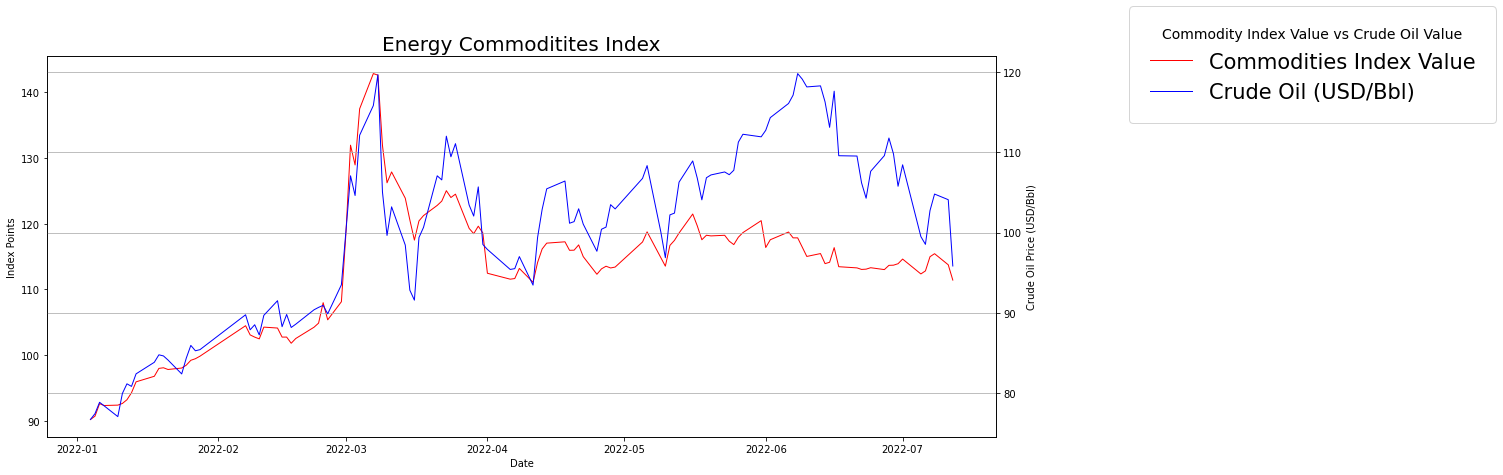

In [258]:
fig, axis_1 = plt.subplots(figsize=(17, 7))
axis_2 = axis_1.twinx()

axis_1.plot(commodity_index.index.tolist(), commodity_index['index_value'].values.tolist(), marker='', color='red', linewidth=1, label='Commodities Index Value')
axis_2.plot(df.index.tolist(), df['Crude Oil (CL1:COM)'].values.tolist(), marker='', color='blue', linewidth=1, label='Crude Oil (USD/Bbl)')

# setting axis labels
axis_1.set_xlabel('Date')
axis_1.set_ylabel('Index Points')
axis_2.set_ylabel('Crude Oil Price (USD/Bbl)')

fig.legend(
    title='Commodity Index Value vs Crude Oil Value',
    loc='upper left',
    bbox_to_anchor=(1,0,0.5,1),
    fontsize=21,
    ncol=1,
    title_fontsize=14,
    borderpad=1)
plt.grid(True)

plt.title('Energy Commoditites Index', size=20)
plt.show()

In [260]:
commodity_index_pct_change = commodity_index['index_value'].pct_change()
crude_oil_pct_change = df['Crude Oil (CL1:COM)'].pct_change()
heating_pct_change = df['Heating Oil (HO1:COM)'].pct_change()

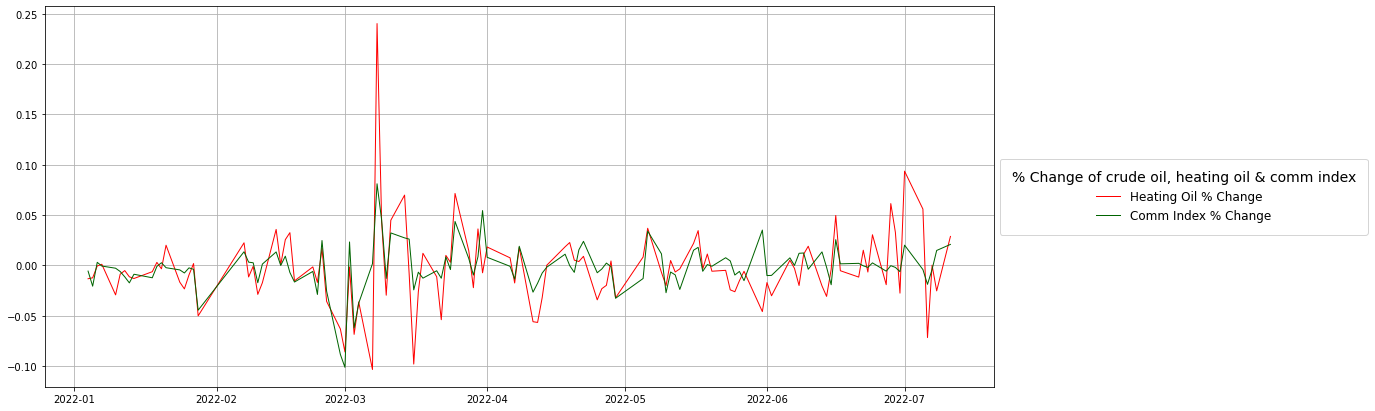

In [263]:
plt.subplots(figsize=(17, 7))

# plt.plot( crude_oil_pct_change.index.tolist(), crude_oil_pct_change.values.tolist(),marker='', color='blue', linewidth=1, label="Crude Oil % Change")
plt.plot( heating_pct_change.index.tolist(), heating_pct_change.values.tolist(), marker='', color='red', linewidth=1, label="Heating Oil % Change")
plt.plot( commodity_index_pct_change.index.tolist(), commodity_index_pct_change.values.tolist(), marker='', color='darkgreen', linewidth=1, label="Comm Index % Change")


plt.legend(
          title="% Change of crude oil, heating oil & comm index",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          ncol=1,
          title_fontsize=14,
          borderpad=1)
plt.grid(True)

# plt.title("Covid's impact on energies", size=20)
plt.show()